# Decision Tree Classifier

### Name: Leah Nicholson
### Problem: Design and develop a Machine learning model to predict Loan using Decision Trees. 
### Date: 06/1/2025
### Dataset: Loans dataset
The Loan Repayment dataset is made up of 1004 rows and 6 columns. <br/>
Each row represents information about a particular person that relates to loan repayment. <br/>


**Column Descriptions:** <br/>
Initial payment - Amount of first payment made for a loan<br/>
Last payment - Last payment made for the loan<br/>
Credit score - An individual's creditworthiness - higher credit score typically indicates a lower risk to lenders, implying that the individual is more likely to repay their debts<br/>
House number - An internal tracking number for each house<br/>
Sum - Sum of all payments (or loan total)<br/>
Result - Based on feature correlations, I assume "result" = "yes" indicates the loan was approved/repaid (1), and "no" means the loan was denied/unpaid (0)<br/>


## Import Data and Explore

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import tree

In [4]:
# Import data and display first 5 rows
loans = pd.read_csv('Loans_Dataset.csv')
loans.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [5]:
# Display last 5 rows
loans.tail()

,initial_payment,last_payment,credit_score,house_number,sum,result
999,168,14798,834,4937,20737,No
1000,234,14567,756,4766,20678,yes
1001,450,13897,867,7896,210456,yes
1002,347,14999,687,9876,246789,yes
1003,467,13555,666,7899,21786,yes


In [6]:
len(loans)

1004

In [7]:
loans.shape

(1004, 6)

## Preprocessing

In [9]:
# Check for missing values - none
loans.isnull().sum()

initial_payment    0
last_payment       0
credit_score       0
house_number       0
sum                0
result             0
dtype: int64

In [10]:
# Get required data - drop columns that aren't needed
# House number will not be impacting the outcome (the result column) of repayment
# Sum directly correlates to the result, so that column is removed (to prevent target label leakage/memorization in the ML model)
# Since the starting data was cleaned already, no further Preprocessing will be done here

loans.drop(columns = ['house_number', 'sum'], inplace = True)
loans.head()

,initial_payment,last_payment,credit_score,result
0,201,10018,250,yes
1,205,10016,395,yes
2,257,10129,109,yes
3,246,10064,324,yes
4,117,10115,496,yes


## Describe

In [12]:
# Show description
loans.describe().round(2)

,initial_payment,last_payment,credit_score
count,1004.00,1004.00,1004.00
mean,294.66,12473.01,528.90
std,115.84,1442.13,259.68
min,100.00,10005.00,100.00
25%,195.75,11213.50,302.75
50%,290.00,12467.00,518.00
75%,398.00,13690.00,755.00
max,500.00,14999.00,997.00


## Distribution

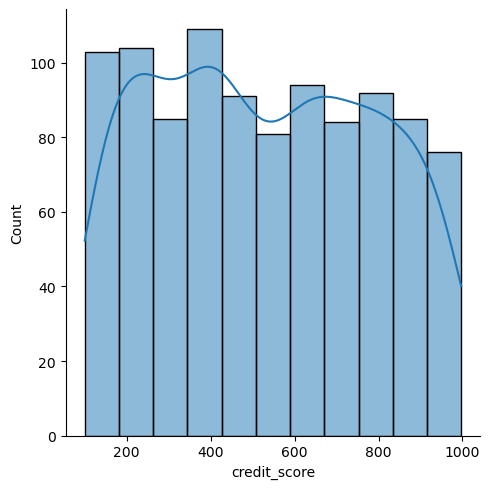

In [14]:
# We visualize the distribution of the data
sns.displot(loans['credit_score'], kde = True)

## Label Encoding

In [16]:
# Initialize the label encoder - we want to convert the Categorical column Result (containing 'yes'/'no') into numerical ('1'/'0')
le = LabelEncoder()
loans['result'] = le.fit_transform(loans['result'])    # We assign the outcome of conversion to overwrite the result column

In [17]:
# Check: confirmed - results column now shows binary numerical values
loans

,initial_payment,last_payment,credit_score,result
0,201,10018,250,1
1,205,10016,395,1
2,257,10129,109,1
3,246,10064,324,1
4,117,10115,496,1
...,...,...,...,...
999,168,14798,834,0
1000,234,14567,756,1
1001,450,13897,867,1
1002,347,14999,687,1


## Correlation Matrix

In [19]:
# Generating the correlation matrix to view a quick overview of the dataset's structure and the interplay between numerical variables
# In decision trees, this tells us Feature Importance (highly correlated features with the target variable) are often good candidates for important splits
# Also allows us to remove redundant features (to simplify the model, make it faster to train, easier to interpret, might prevent overfitting)
# The correlation coefficients range from -1 (neg correlation) to +1 (pos correlation), with 0 being no correlation

loans.corr()

,initial_payment,last_payment,credit_score,result
initial_payment,1.000000,-0.013536,-0.009421,-0.048464
last_payment,-0.013536,1.000000,-0.000805,-0.805640
credit_score,-0.009421,-0.000805,1.000000,-0.076326
result,-0.048464,-0.805640,-0.076326,1.000000


<Axes: >

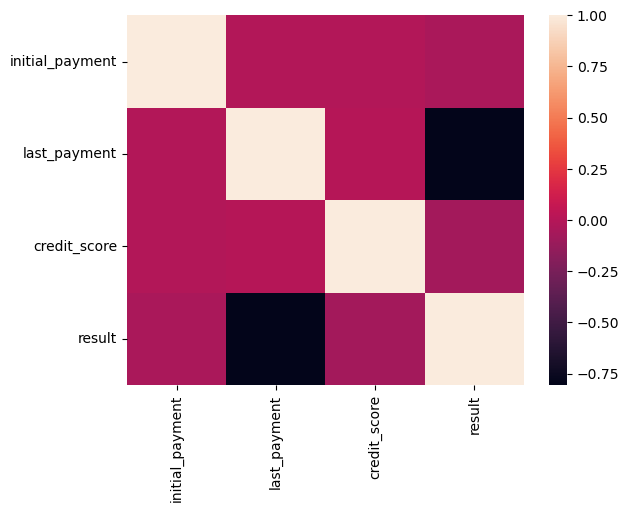

In [20]:
# Displaying a heatmap of the correlation matrix
# Lighter values suggest stronger positve correlation, darker is stronger negative correlation

sns.heatmap(loans.corr())

## Relationship

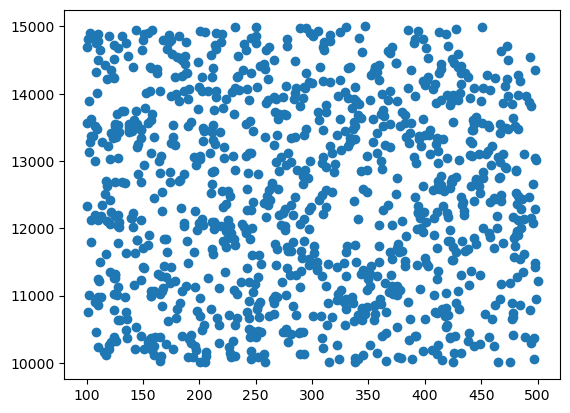

In [22]:
# Relationship between initial payment and last payment
plt.scatter(loans['initial_payment'], loans['last_payment'])   # Basically no relationship

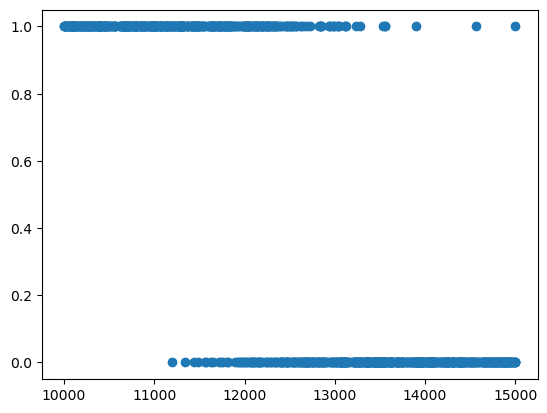

In [23]:
# Relationship between last payment and result
plt.scatter(loans['last_payment'], loans['result'])    

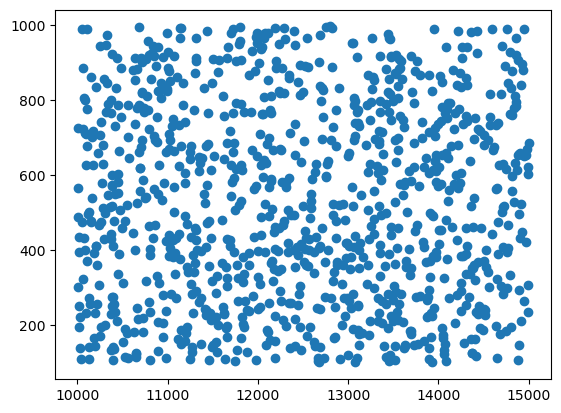

In [24]:
# Relationship between last payment and sum
plt.scatter(loans['last_payment'], loans['credit_score'])    # Basically no correlation

## Split data: Independent and Dependent Variables

In [26]:
# Split data into independent / dependent variables
X = loans.iloc[:, :-1].values
y = loans.iloc[:, -1].values

## Train/Test Sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

## Feature scaling

In [30]:
# Scaling the dataset:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Train Model

In [32]:
# Decision Tree Classification
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=4, min_samples_leaf=5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=100)

In [33]:
original_feature_names = loans.columns[:-1].tolist()
print(f"Original feature names: {original_feature_names}")

Original feature names: ['initial_payment', 'last_payment', 'credit_score']


## Predict Result and Score Model

In [35]:
# Make a Prediction using the ML model
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

# This shows a long result of the prediction (y_pred), and the actual outcome (y_test)


[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]

## Evaluate Model

### Accuracy

In [38]:
accuracy_score(y_test, y_pred)

0.9083665338645418

### Classification Report

In [40]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       138
           1       0.88      0.92      0.90       113

    accuracy                           0.91       251
   macro avg       0.91      0.91      0.91       251
weighted avg       0.91      0.91      0.91       251



### F1 Score

In [42]:
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.9004329004329005


## Confusion Matrix

<Axes: >

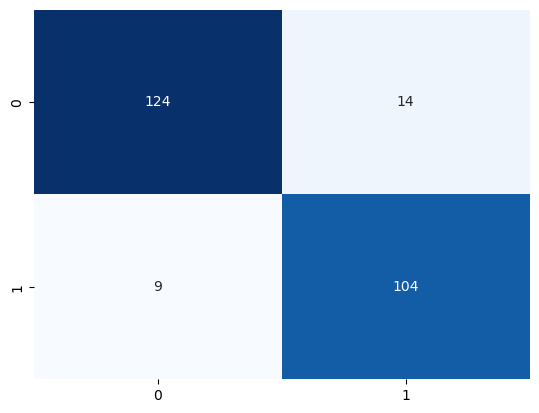

In [44]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

## Check

In [46]:
# Predict result of yes approval = 1  / no not approved 0, with initial_payment 200, last_payment 10000, credit_score 400
print(classifier.predict(sc.transform([[2000, 10000, 400]])))

[1]


In [47]:
# initial_payment 100, last_payment 9000, credit_score 100
print(classifier.predict(sc.transform([[100, 9000, 100]])))

[1]


In [48]:
# Similar to actual data point: 168, 14798, 834 which was also not approved
print(classifier.predict(sc.transform([[169, 14500, 800]])))

[0]


## Visualize Tree

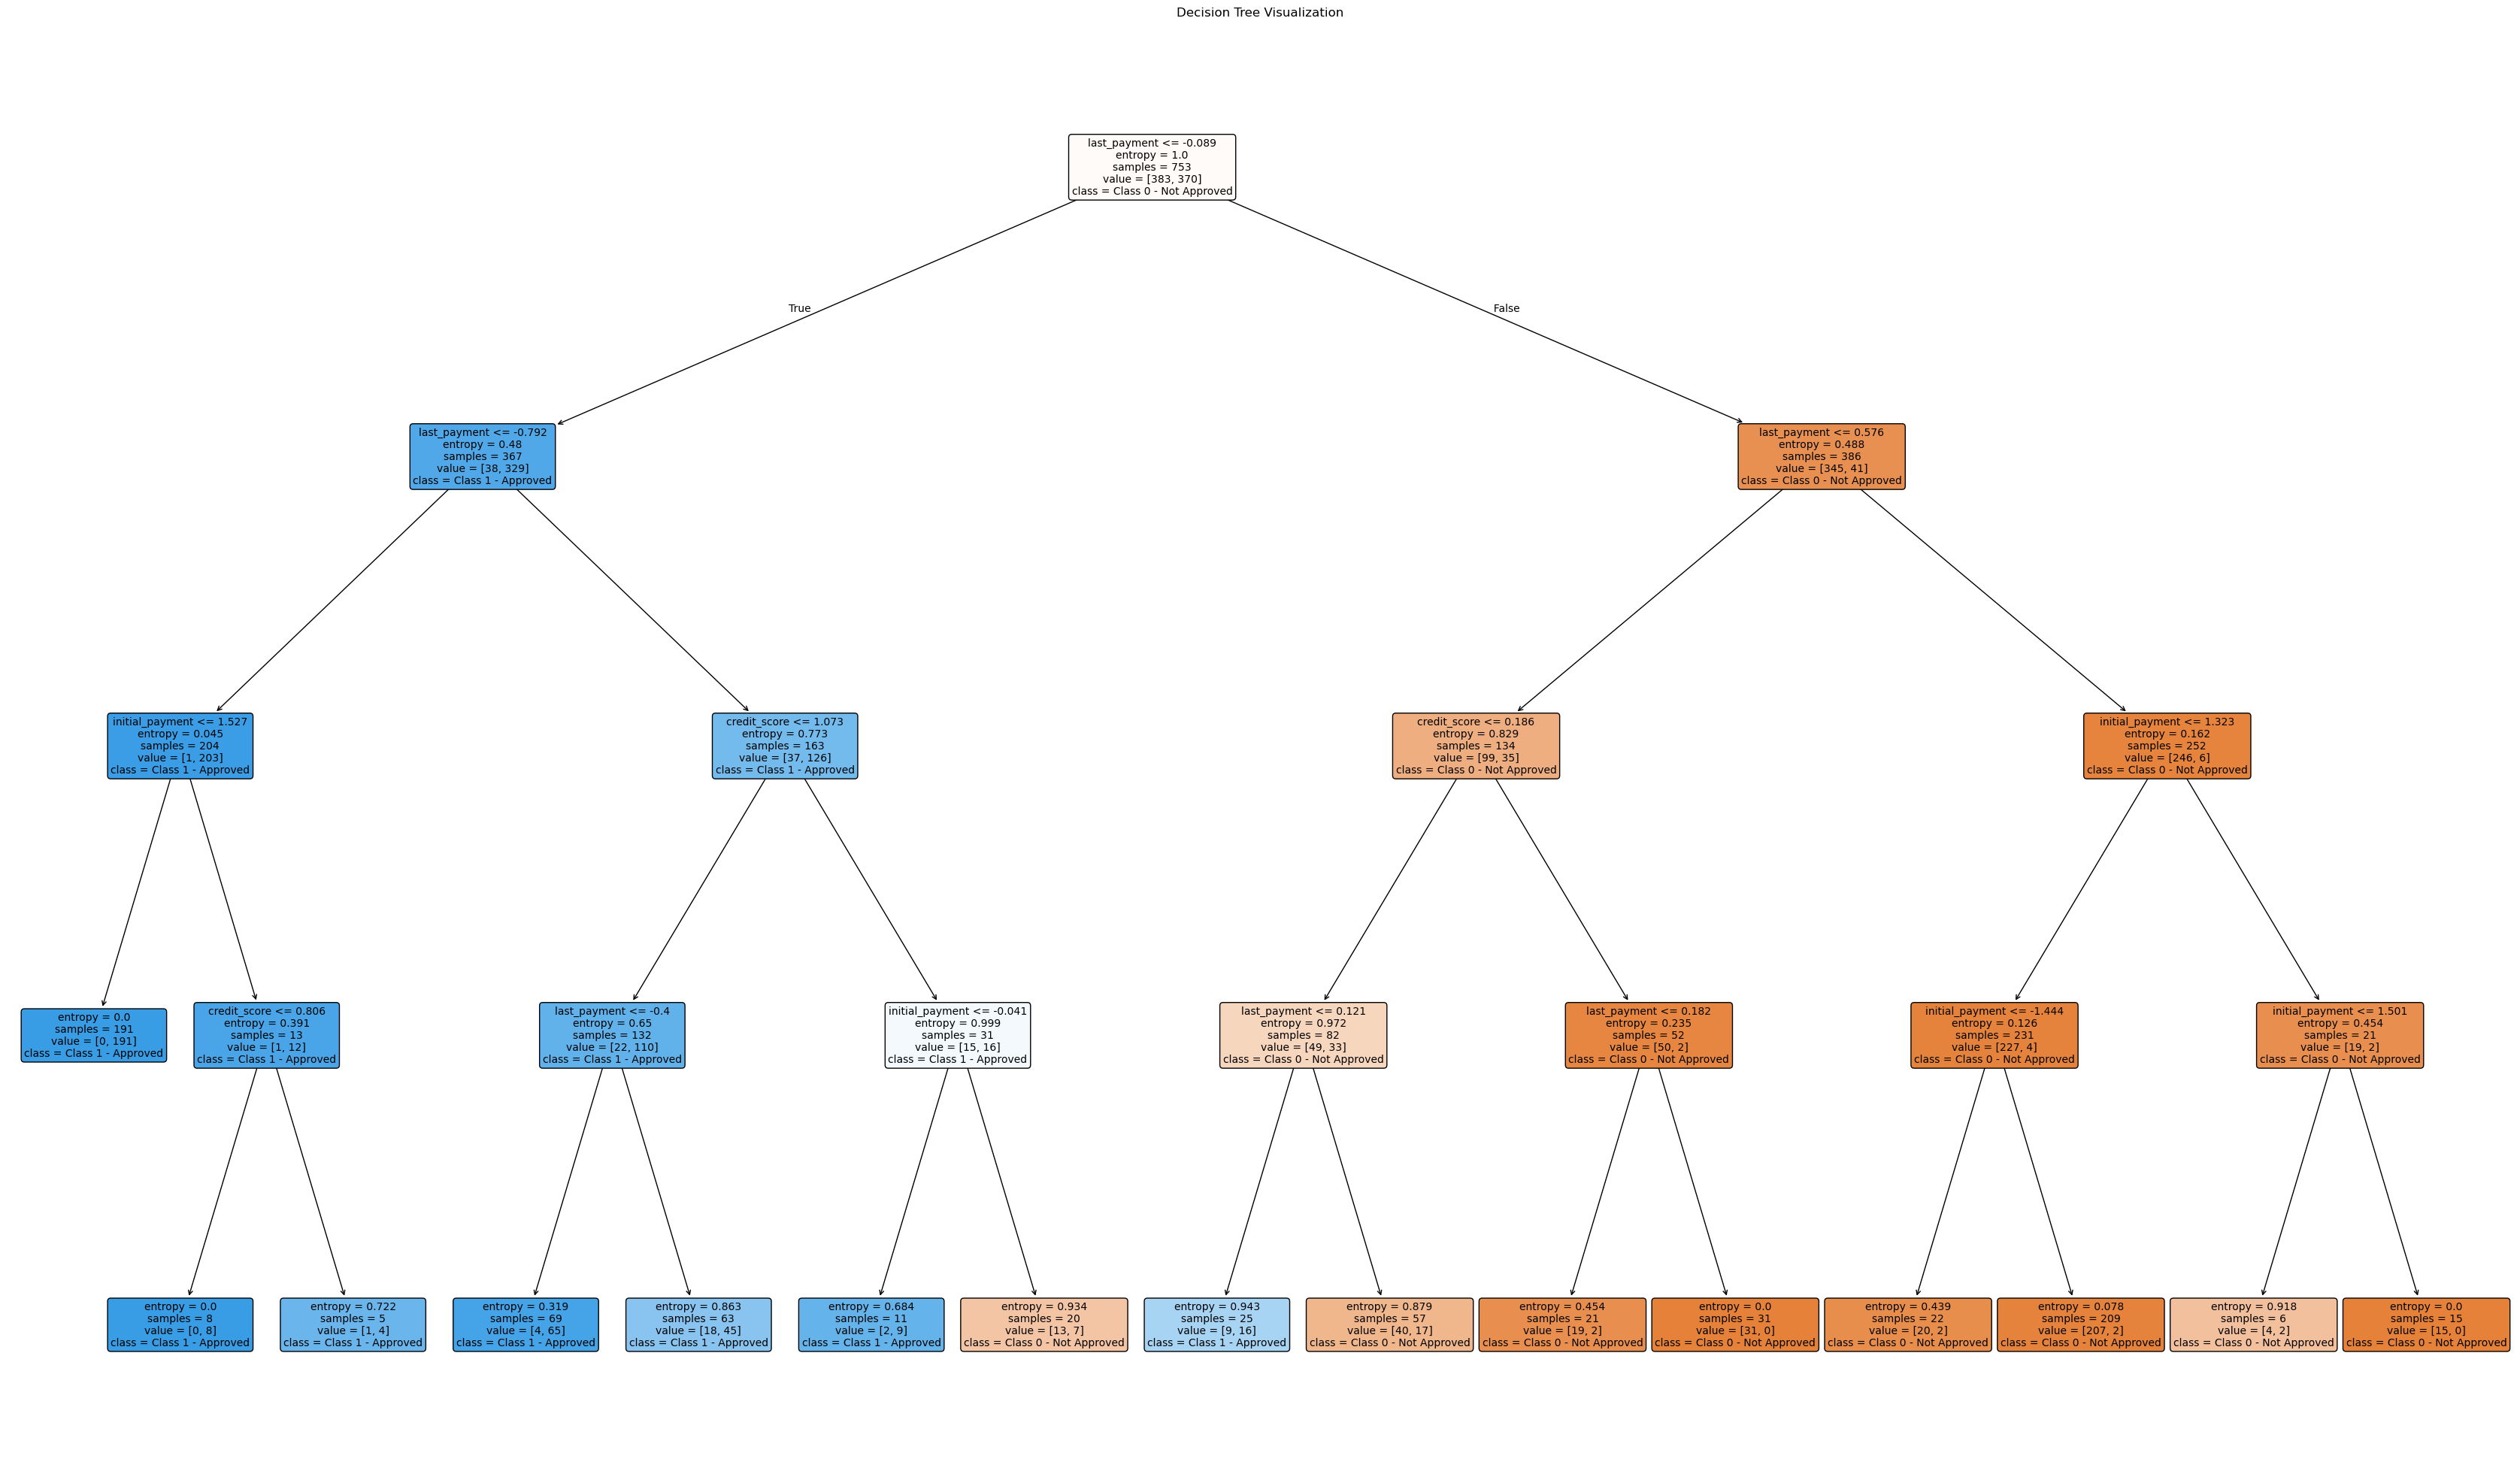

In [50]:
class_names = ["Class 0 - Not Approved", "Class 1 - Approved"] 

plt.figure(figsize = (43, 25)) 

tree.plot_tree(classifier,
               feature_names = original_feature_names, # Uses the names extracted before scaling in original_feature_names
               class_names = class_names,              # Provides meaningful class names defined above
               filled = True,
               rounded = True,
               fontsize = 10)

plt.title("Decision Tree Visualization")
plt.show()